In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV

# Load the data
data = pd.read_excel('Champo.xlsx', 'Data for Clustering')

### EDA

In [25]:
data.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN,Cluster
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0,0


In [10]:
print(data.describe())

       Sum of QtyRequired  Sum of TotalArea  Sum of Amount          DURRY  \
count           45.000000         45.000000   4.500000e+01      45.000000   
mean         12977.555556      13056.589847   6.982099e+05    7103.000000   
std          30550.741969      34474.177202   1.808977e+06   22160.531083   
min              2.000000          1.350000   3.288752e+02       0.000000   
25%            565.000000        376.769000   3.970124e+04       0.000000   
50%           1566.000000       2120.000000   1.167783e+05     289.000000   
75%          11146.000000       8451.562500   4.266260e+05    1560.000000   
max         183206.000000     209725.222000   1.134105e+07  139618.000000   

          HANDLOOM  DOUBLE BACK    JACQUARD   HAND TUFTED    HAND WOVEN  \
count    45.000000    45.000000   45.000000     45.000000     45.000000   
mean    185.533333   407.911111   89.422222   3650.844444    867.688889   
std     607.655091  1166.855094  175.796821   9917.428493   2418.324334   
min   

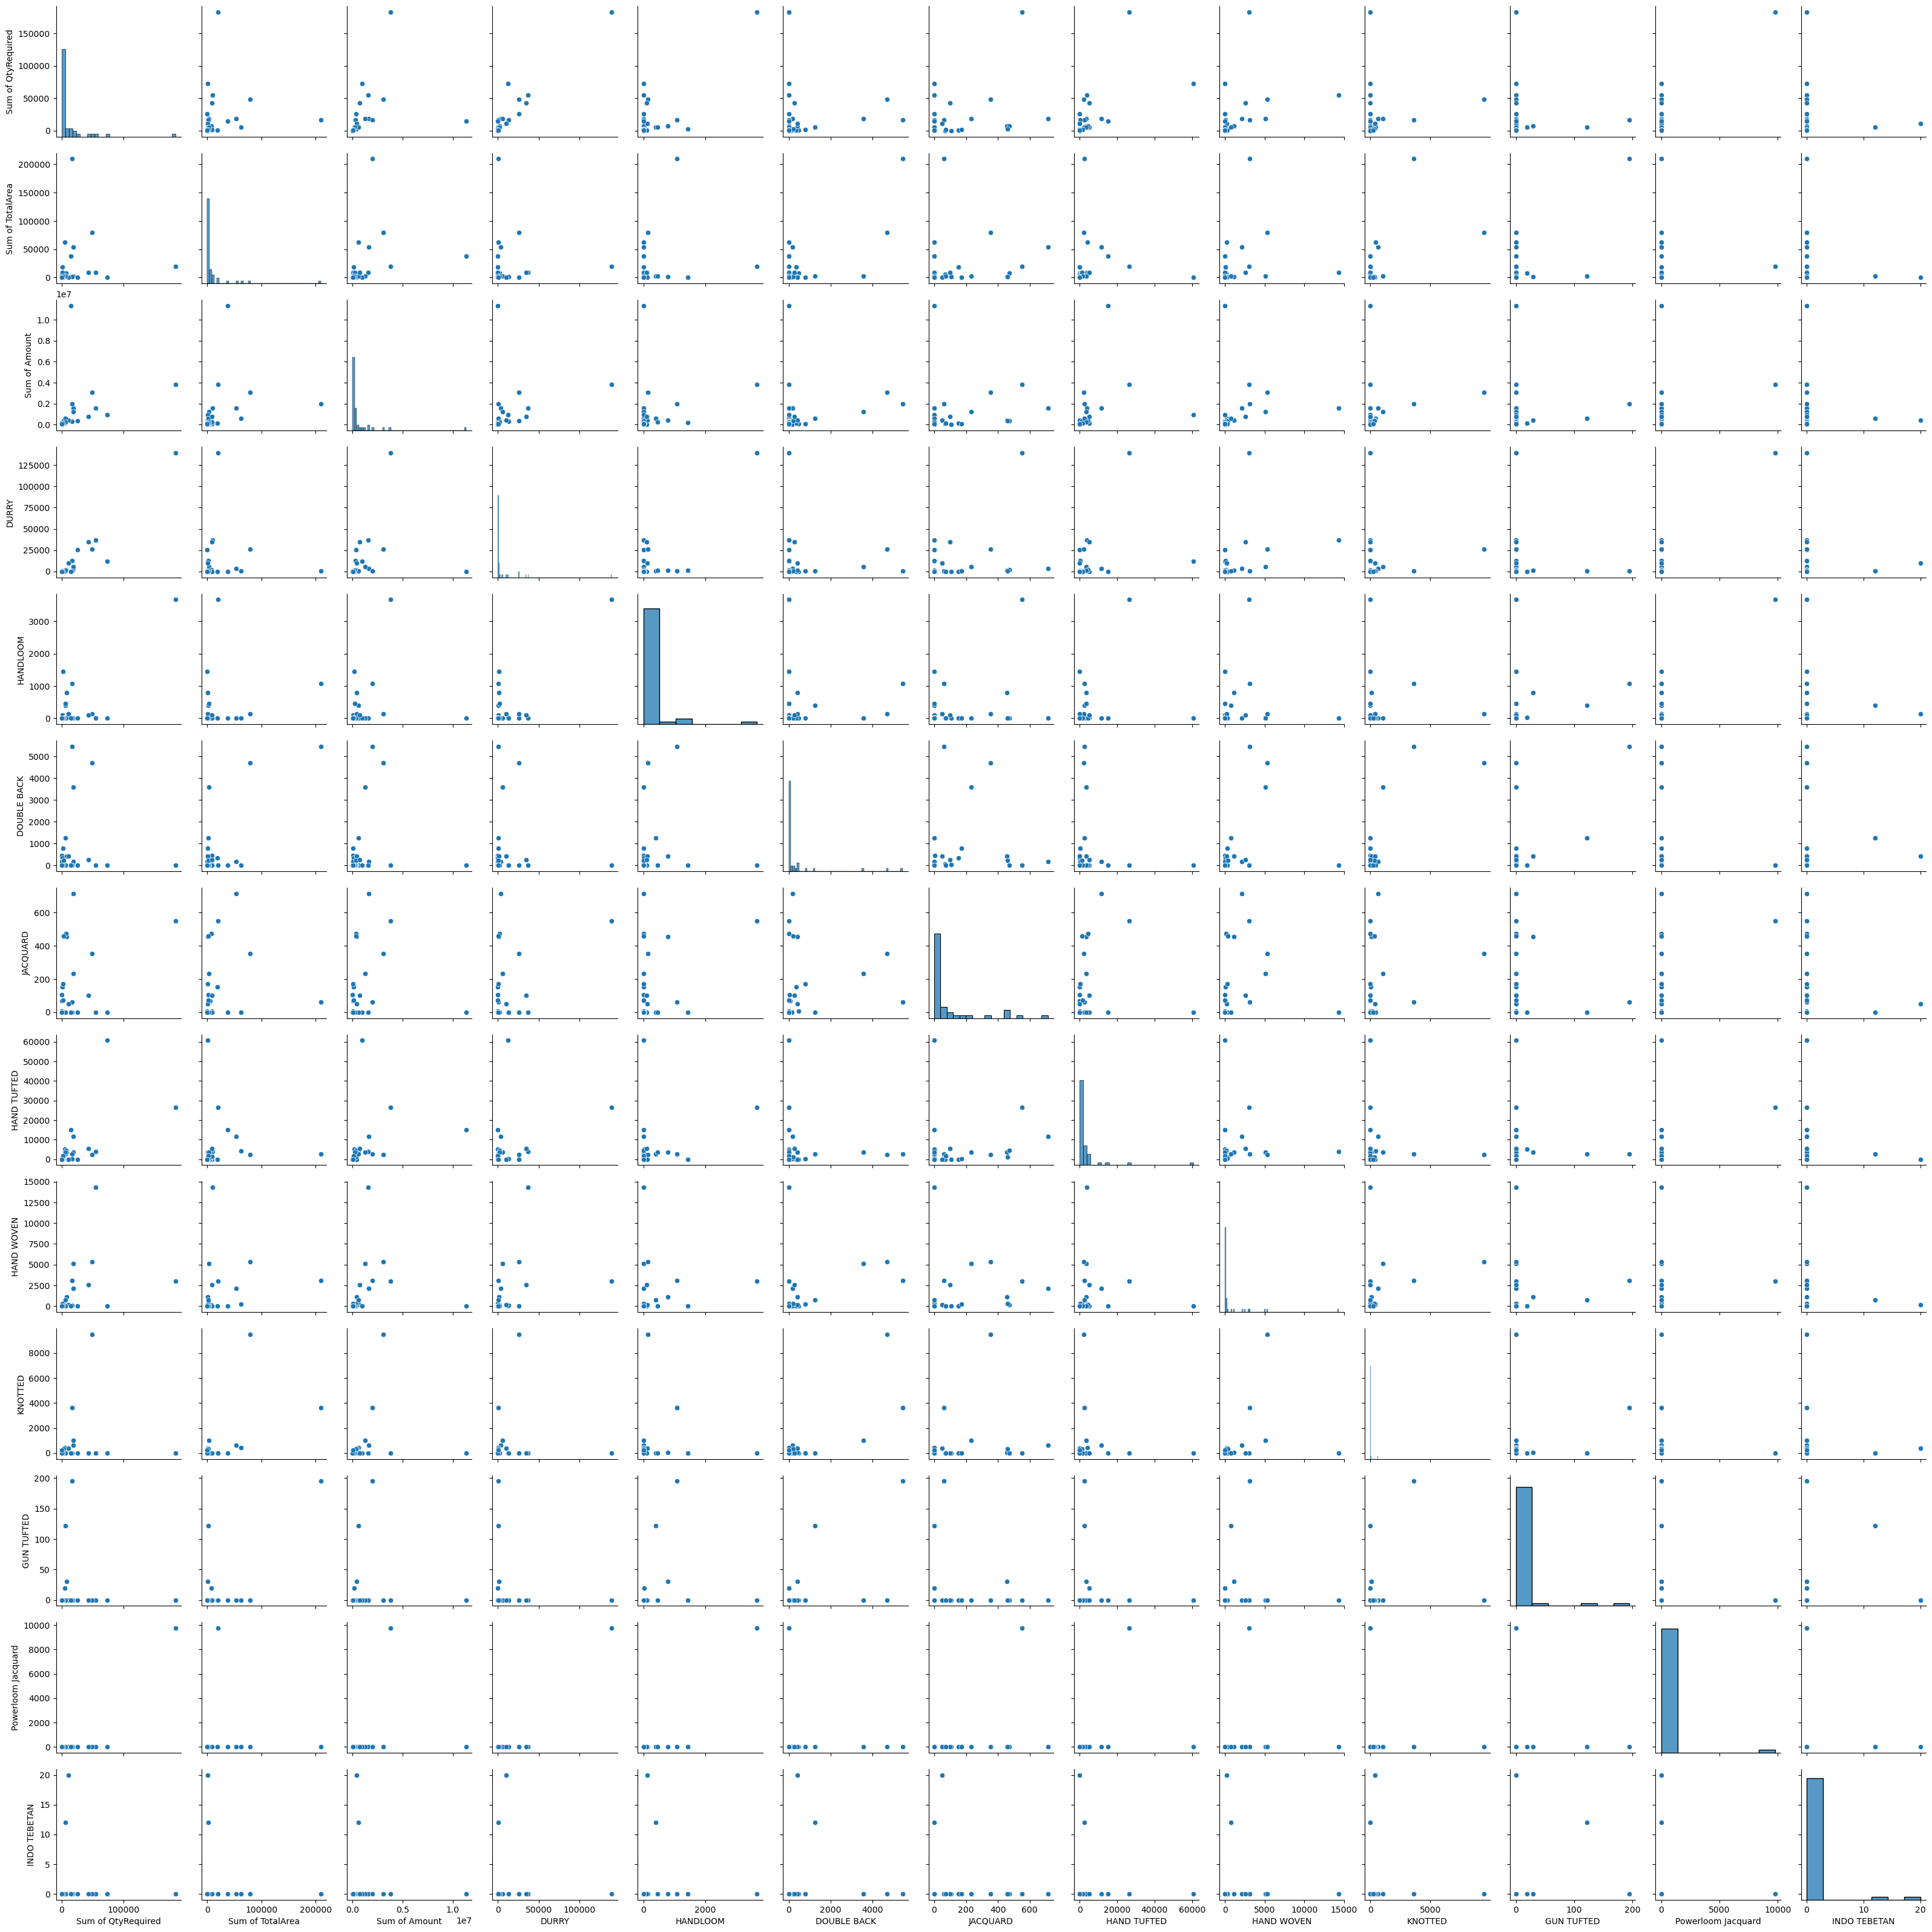

In [13]:
sns.pairplot(data.drop('Row Labels', axis=1))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_61316\1213778306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


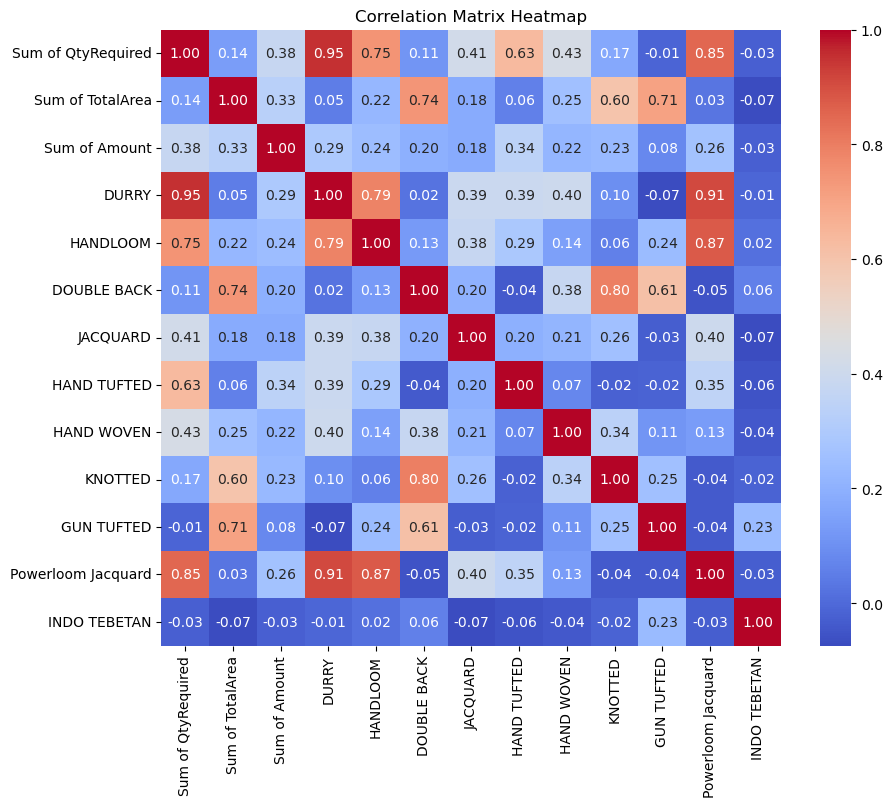

In [14]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Standard Normalization

In [2]:
# Normalize the features
scaler = StandardScaler()
X = data.drop(['Row Labels'], axis=1)
X = scaler.fit_transform(X)

### K-Means Clustering

In [8]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

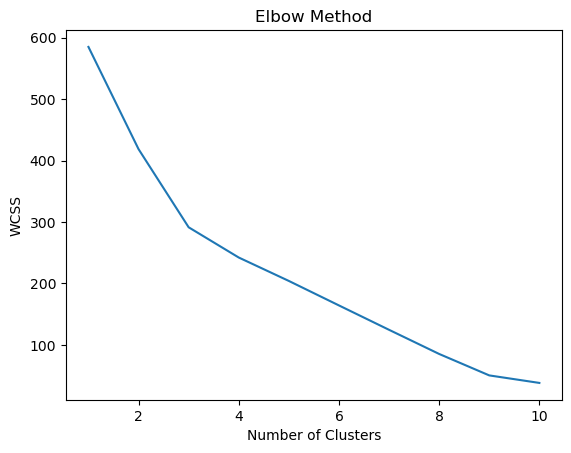

In [9]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Based on the elbow method, choose the optimal number of clusters
optimal_n_clusters = 3  # Update this value based on the elbow plot

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    42
2     2
1     1
Name: Cluster, dtype: int64


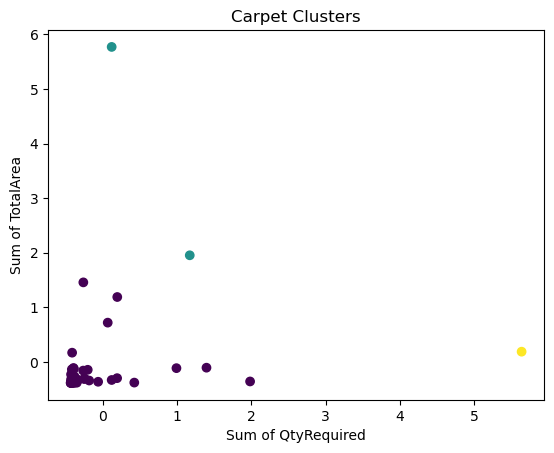

In [6]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Sum of QtyRequired')
plt.ylabel('Sum of TotalArea')
plt.title('Carpet Clusters')
plt.show()

In [7]:
# Analyze the clusters
for cluster_id in range(optimal_n_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['Row Labels', 'Sum of QtyRequired', 'Sum of TotalArea']])

Cluster 0:
   Row Labels  Sum of QtyRequired  Sum of TotalArea
0        A-11                2466          139.5900
1         A-6                 131         2086.0000
2         A-9               18923        53625.6544
3         B-2                 624          202.8987
4         B-3                 464         8451.5625
5         B-4                 692         3244.2500
6         C-1                5137        62763.0555
7         C-2               55172         9510.0000
8         C-3                1566         4016.0000
9          CC                5077         7695.9930
10        CTS                 565          420.0000
11         DR                 149          305.9765
12        E-2                 581        18878.0000
13        F-1                1158         2822.0000
14        F-6                1400            1.3500
15        G-1                 146         5348.0000
16        G-4                 119           21.9352
17        H-1                1137         9327.0625
1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

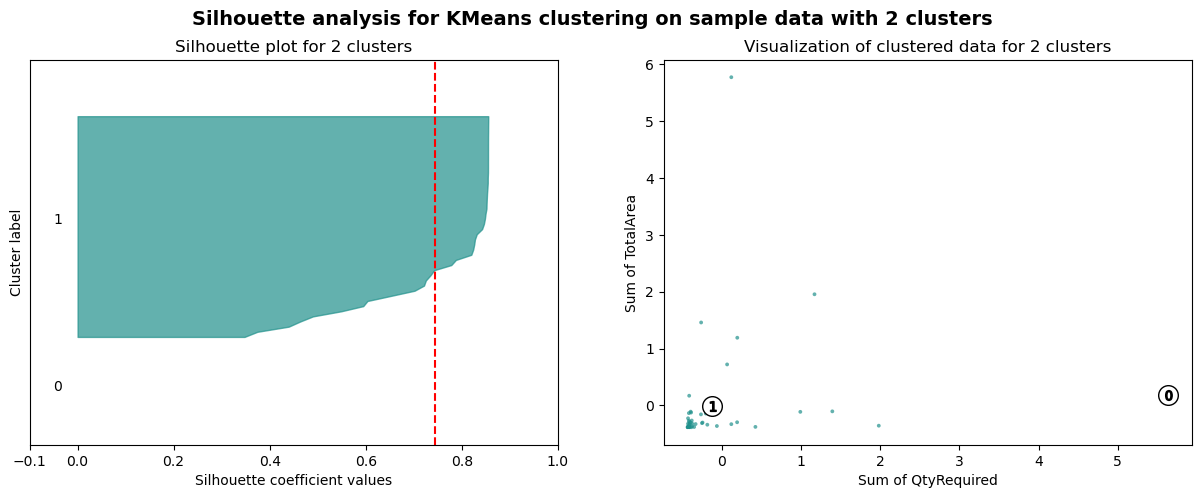

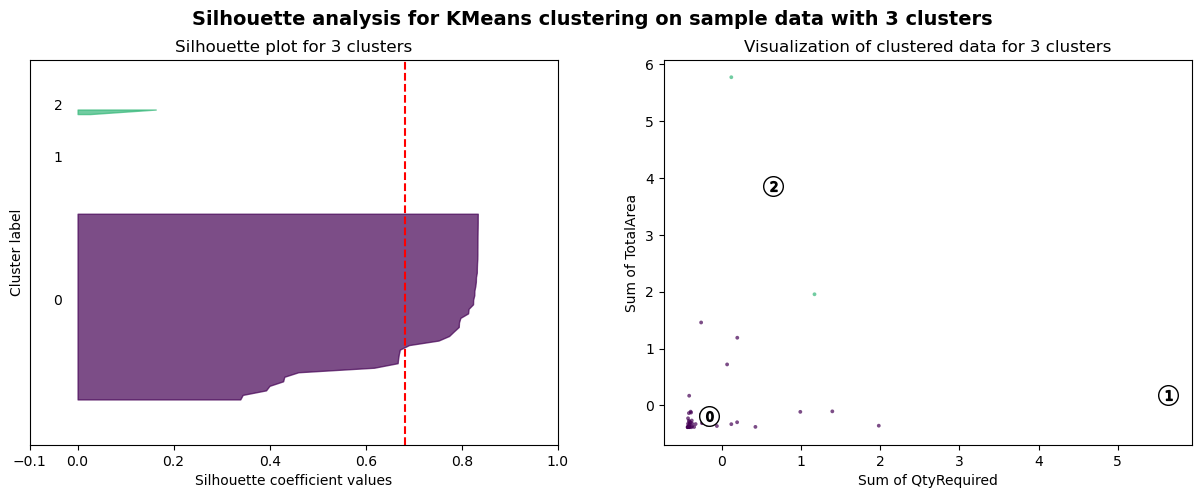

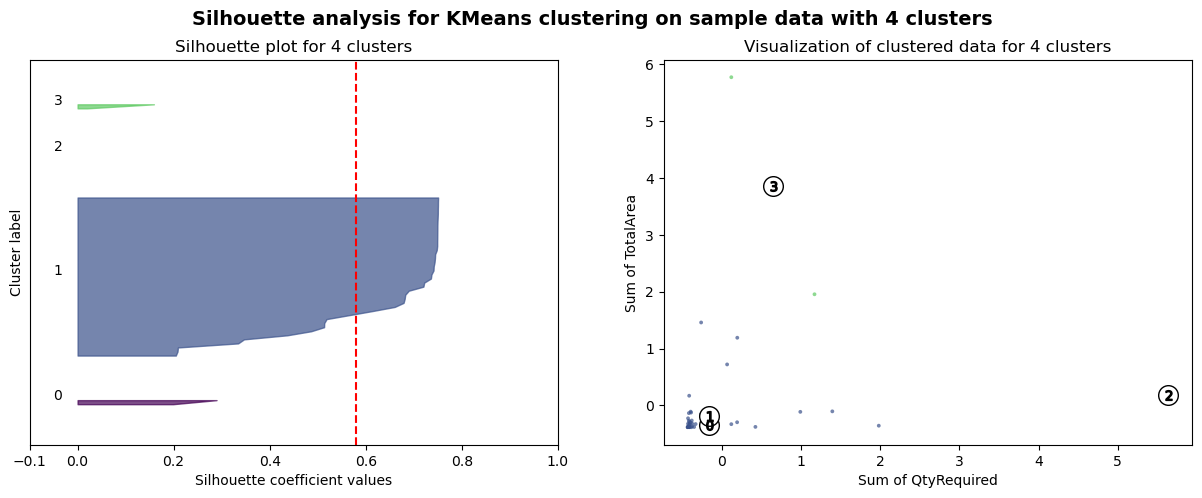

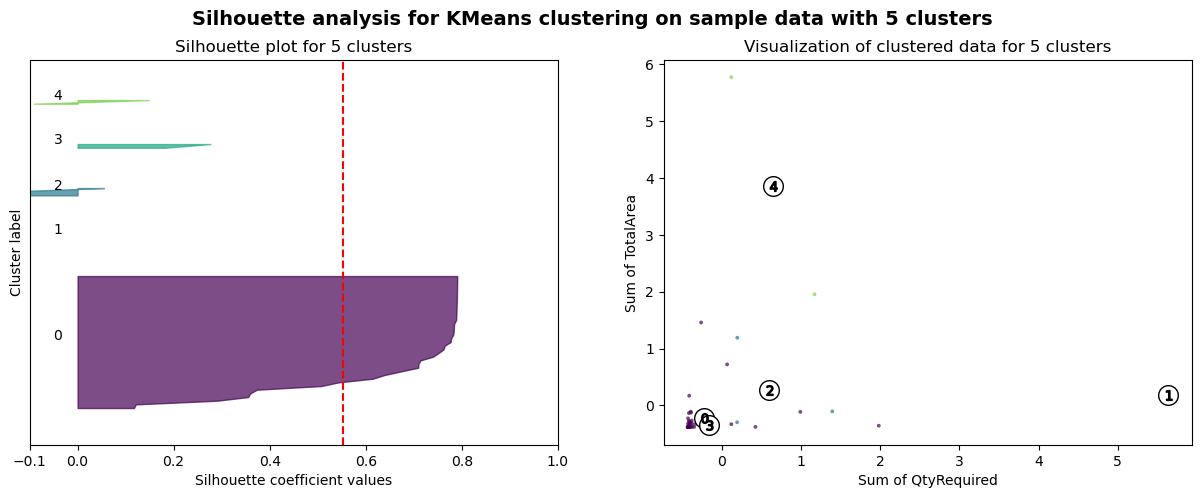

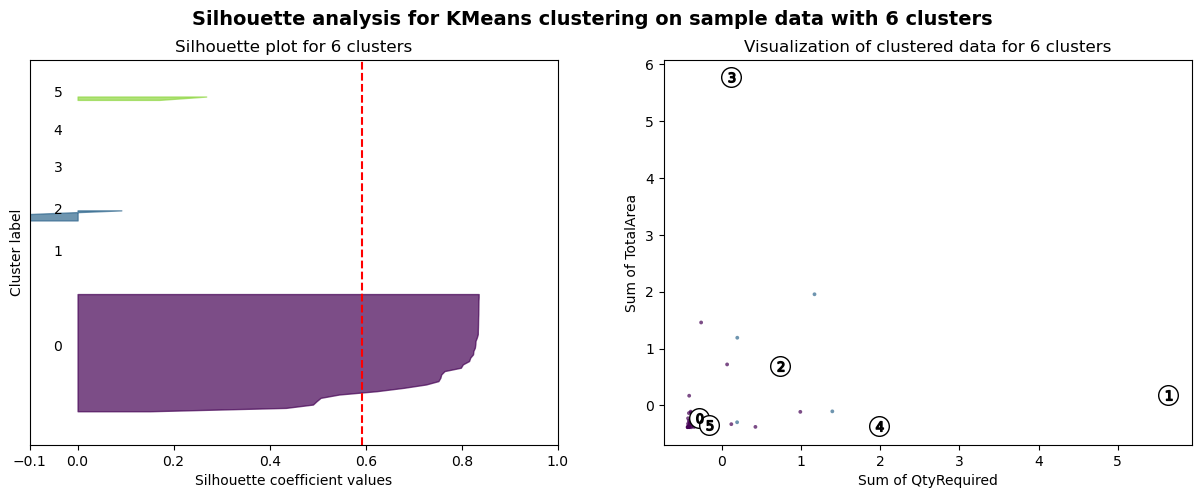

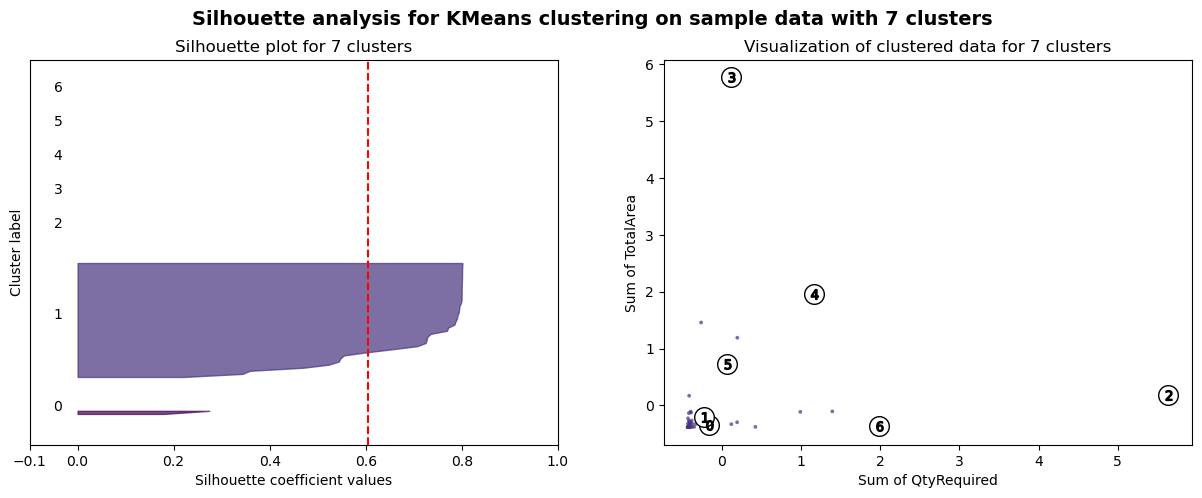

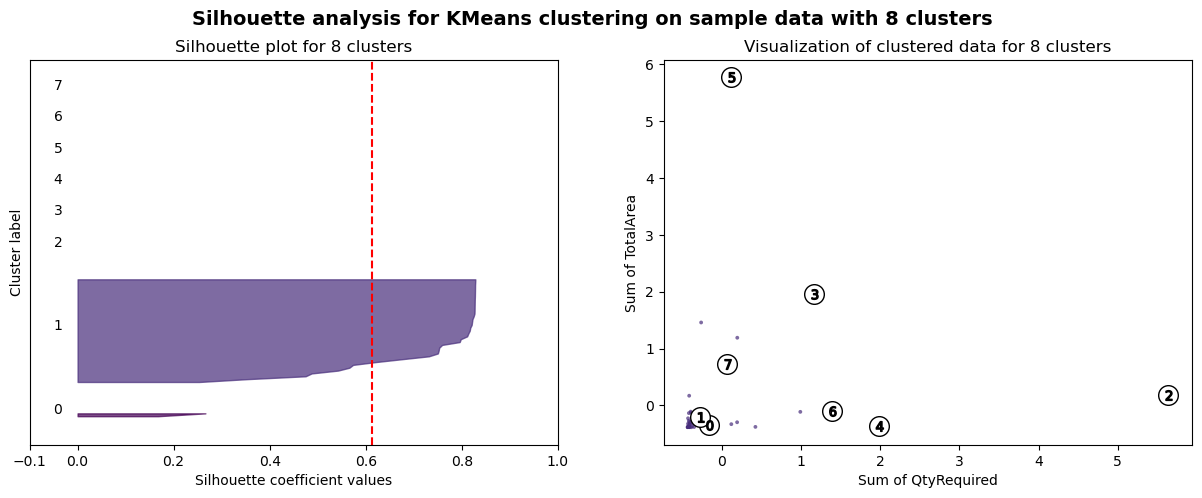

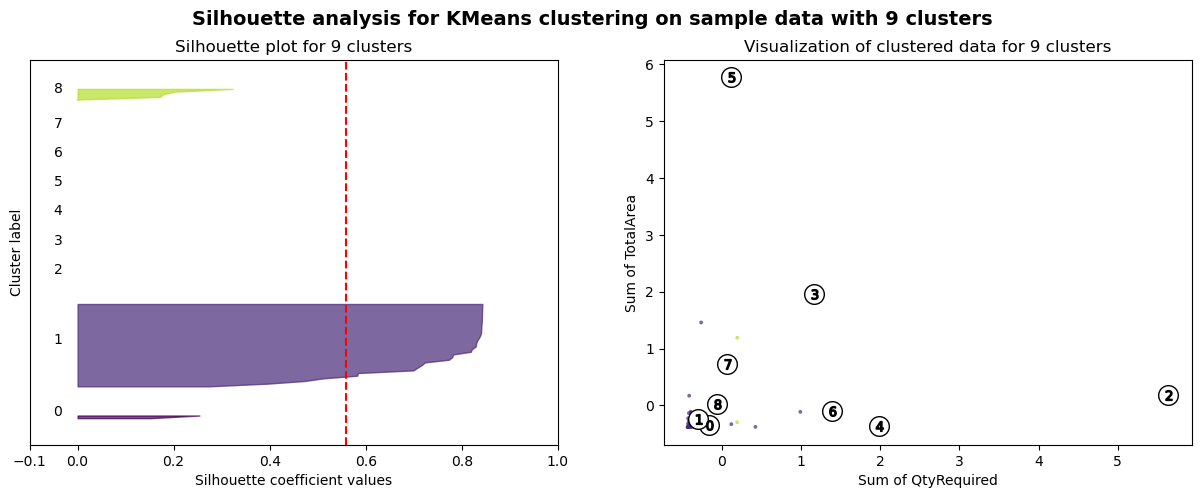

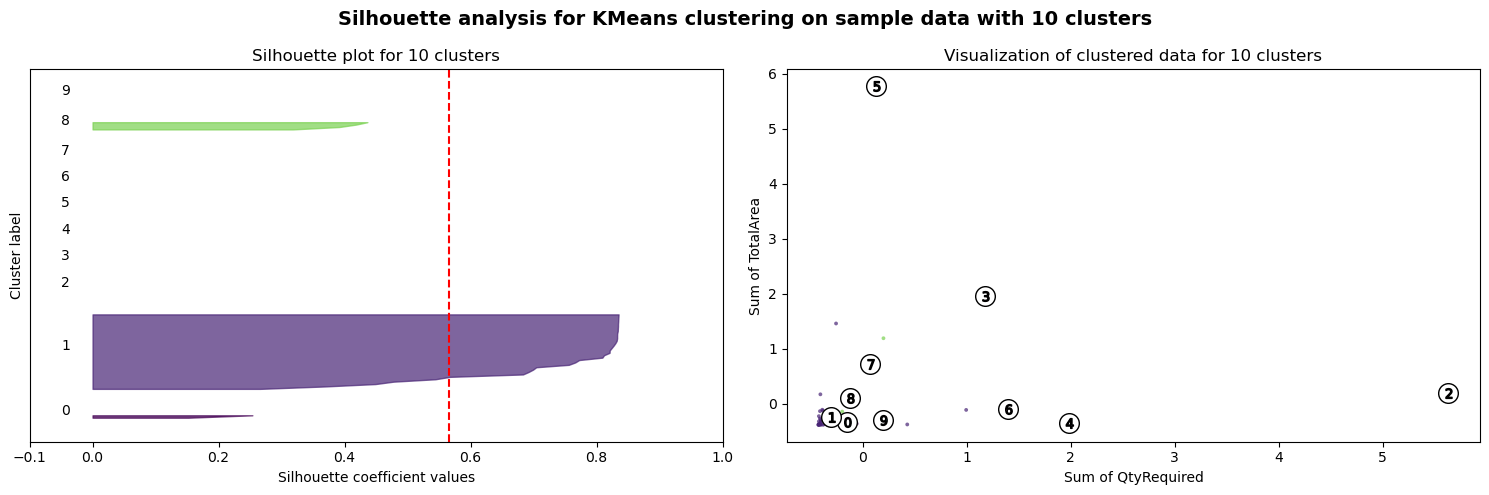

In [21]:
# Calculate silhouette scores and visualize them
silhouette_scores = []
for n_clusters in range(2, 11):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.viridis(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.viridis(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("Visualization of clustered data for {} clusters".format(n_clusters))
    ax2.set_xlabel("Sum of QtyRequired")
    ax2.set_ylabel("Sum of TotalArea")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with {} clusters".format(n_clusters)), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
# Based on the silhouette score, choose the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from 2 clusters

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    44
1     1
Name: Cluster, dtype: int64


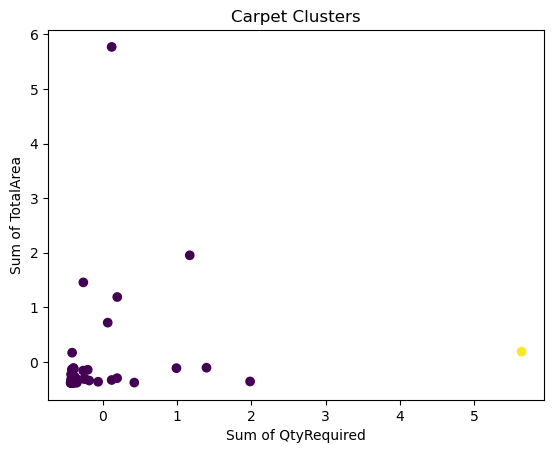

In [23]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Sum of QtyRequired')
plt.ylabel('Sum of TotalArea')
plt.title('Carpet Clusters')
plt.show()

In [24]:
# Analyze the clusters
for cluster_id in range(optimal_n_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['Row Labels', 'Sum of QtyRequired', 'Sum of TotalArea']])

Cluster 0:
   Row Labels  Sum of QtyRequired  Sum of TotalArea
0        A-11                2466          139.5900
1         A-6                 131         2086.0000
2         A-9               18923        53625.6544
3         B-2                 624          202.8987
4         B-3                 464         8451.5625
5         B-4                 692         3244.2500
6         C-1                5137        62763.0555
7         C-2               55172         9510.0000
8         C-3                1566         4016.0000
9          CC                5077         7695.9930
10        CTS                 565          420.0000
11         DR                 149          305.9765
12        E-2                 581        18878.0000
13        F-1                1158         2822.0000
14        F-6                1400            1.3500
15        G-1                 146         5348.0000
16        G-4                 119           21.9352
17        H-1                1137         9327.0625
1

In [37]:
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    return silhouette_avg

# Grid search for hyperparameter tuning
param_grid = {'n_clusters': range(2, 11)}  # Range of cluster numbers to try
grid_search = GridSearchCV(KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0),
                           param_grid=param_grid, scoring= silhouette_scorer, cv=5, n_jobs=-1)
grid_search.fit(X)

# Print the best hyperparameters and silhouette score
print("Best Number of Clusters:", grid_search.best_params_['n_clusters'])
print("Best Silhouette Score:", -grid_search.best_score_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best Number of Clusters: 2
Best Silhouette Score: nan


In [38]:
# Visualize the results
best_kmeans = KMeans(n_clusters=grid_search.best_params_['n_clusters'], init='k-means++', max_iter=300, n_init=10, random_state=0)
best_kmeans.fit(X)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=0)

In [39]:
# Add cluster labels to the original DataFrame
data['Cluster'] = best_kmeans.labels_

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

0    44
1     1
Name: Cluster, dtype: int64


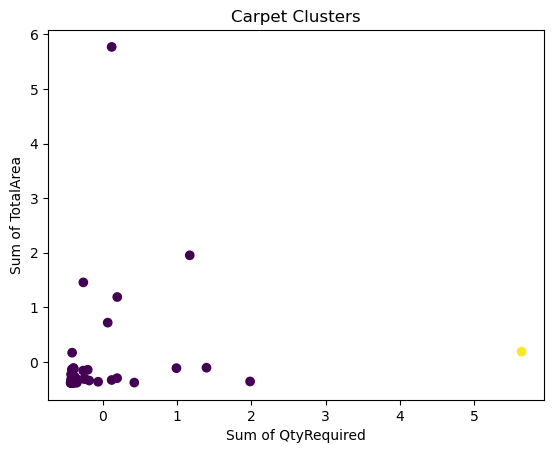

In [40]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=best_kmeans.labels_, cmap='viridis')
plt.xlabel('Sum of QtyRequired')
plt.ylabel('Sum of TotalArea')
plt.title('Carpet Clusters')
plt.show()

In [ ]:
# Analyze the clusters
for cluster_id in range(grid_search.best_params_['n_clusters']):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['Row Labels', 'Sum of QtyRequired', 'Sum of TotalArea']])